## Grafico de Lineas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

years= np.random.randint(2016,2021,100)
values= np.random.randint(40,55,100)

df = pd.DataFrame(data= {"years":years, "values":values})
df = df.groupby("years")["values"].sum().reset_index()
df

,years,values
0,2016,1009
1,2017,889
2,2018,1077
3,2019,536
4,2020,1105


In [2]:
cols2 = { "years": np.random.randint(2016,2021,100), "values": np.random.randint(40,55,100)
}

df2 = pd.DataFrame(data=cols2)
df2= df2.groupby("years")["values"].sum().reset_index()
df2

,years,values
0,2016,959
1,2017,766
2,2018,1054
3,2019,942
4,2020,1034


### Creando una grafica de tiempo
#### Metodo 1

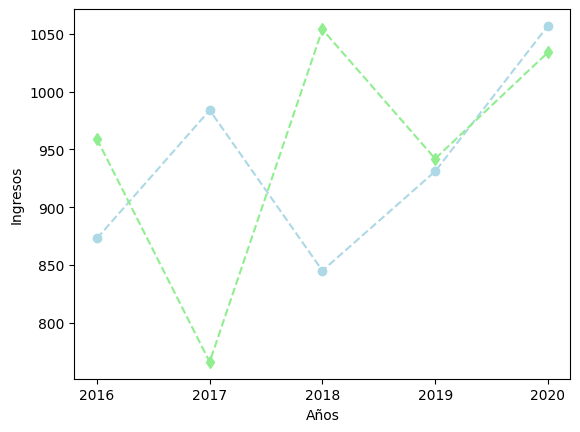

<Figure size 1500x500 with 0 Axes>

In [4]:
#DF 1
x= df["years"]
y= df["values"]

#DF 2
x2 = df2["years"]
y2 = df2["values"]
 
#Graficando ambas
plt.plot(x,y, marker="o", linestyle="--", color="lightblue")
plt.plot(x2,y2,  marker="d", linestyle="--", color="lightgreen")

plt.xlabel("Años")
plt.ylabel("Ingresos")
plt.xticks(df["years"]) #antes me ponía decimales y ahora los dejo tal cúal como mi base, puedes agregarles nombres personalizados con labels= ["name1", "name2"...]
plt.figure(figsize=[15,5])
plt.show()

### Creando gráfica de tiempo
#### Metodo 2, graficando en conjunto 

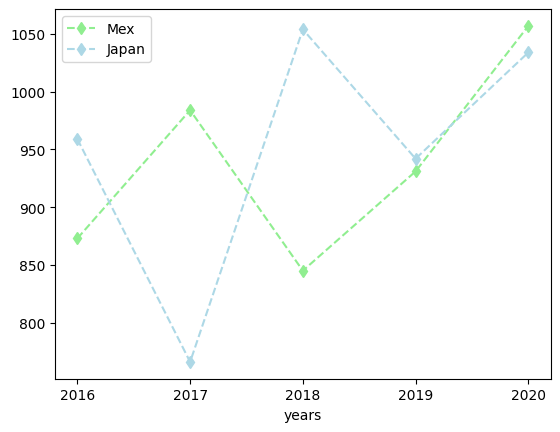

In [5]:
fusion_df =df.merge(right=df2, how='outer', on="years")
new_fusion= fusion_df.groupby("years")[["values_x","values_y"]].sum()

new_fusion.plot( marker="d", linestyle="--", color=["lightgreen","lightblue"])
plt.xticks(range(2016,2021))
plt.legend(["Mex","Japan"])
plt.show()

### Creando gráfica de tiempo
#### Metodo 3

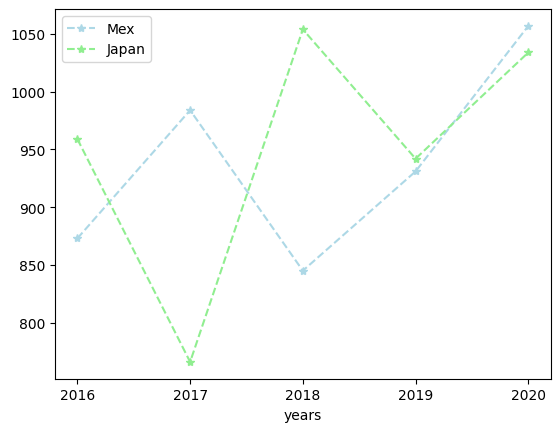

In [8]:
new_fusion = fusion_df.set_index(fusion_df["years"])
new_fusion = new_fusion.drop("years", axis=1,)
new_fusion.plot(marker="*", color=["lightblue", "lightgreen"], linestyle="--")
plt.xticks(new_fusion.index)
new_fusion.index
plt.legend(["Mex","Japan"])

## Gráfico de Barras

In [133]:
import numpy as np
import pandas as pd

x= np.random.randint(0,50,[2,50])
years = np.random.randint(2011,2021,50)
df_bars = pd.DataFrame(data={ "years": years, "Mex_medals":x[0], "Japan_medals":x[1]})
df_bars = df_bars.groupby("years")[["Mex_medals","Japan_medals"]].sum()

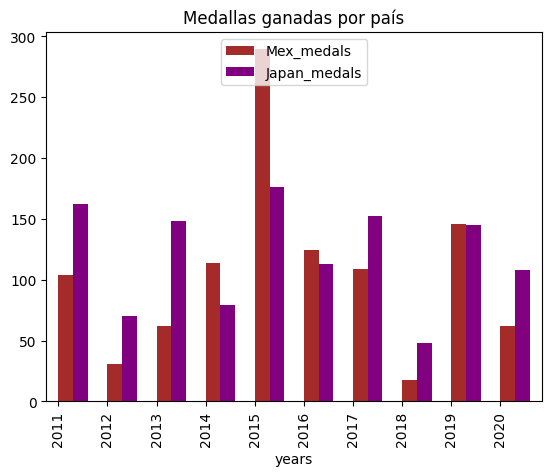

In [134]:
df_bars.plot(kind='bar', title="Medallas ganadas por país", align="edge", width=0.6, color= ["brown","purple"])
plt.legend(loc="upper center")
plt.show()

## Gráfica de Pie

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x_list = np.random.uniform(1,25,3).tolist()
x_list.append(100-sum(x_list))
names = ["Africa", "America" , "Europe", "Asia"]
pie_df = pd.DataFrame(data= {"names":names , "domination": x_list})

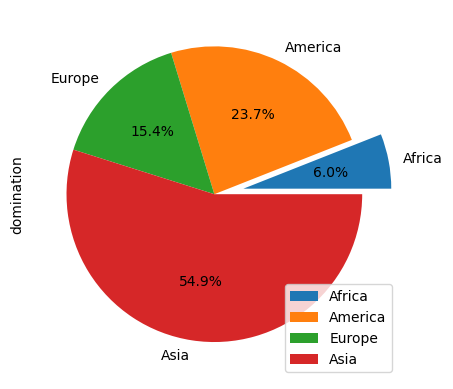

In [11]:
# pie_df.plot(kind="pie", x="names", y="domination")
# plt.xticks(pie_df["names"])


pie_df.plot(kind="pie", y="domination", labels=pie_df["names"], autopct="%1.1f%%" , explode=[0.2,0,0,0.0])
plt.legend(loc="lower right")
plt.show()


## Histogramas

### Histogramas con matplotlib

Los histogramas son utilizados para mostrar la frecuencia y la densidad de los elementos a analizar, en el gráfico a continuación veremos un histograma de frecuencia creado a partir de numeros aleatorios

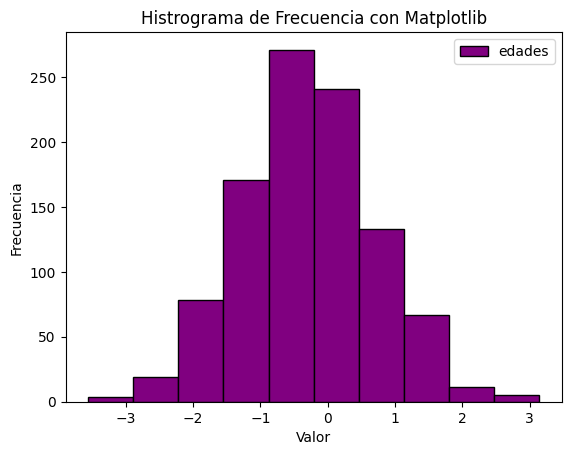

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

edades = np.random.randn(1000)
df_hist = pd.DataFrame(data= {"edades":edades})
fig_hist_freq_1 = df_hist.plot(kind="hist", edgecolor= "black", align="left", orientation="vertical", color="purple")
plt.title('Histrograma de Frecuencia con Matplotlib')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


Ahora mostraremos un histograma de dispersión con la librería Matplotlib. Es importante mencionar que Matplotlib no proporciona funciones específicas para calcular la densidad de kernel (como lo haría Seaborn) por lo que es necesario usar SciPy con el modulo de gaussian_kde

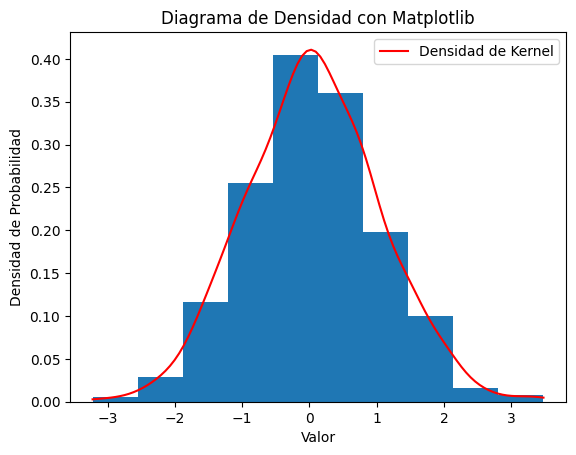

In [49]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calcula la estimación de densidad de kernel
kde = gaussian_kde(df_hist['edades'])

# Crea un rango de valores para el eje x
x_vals = np.linspace(min(df_hist['edades']),max(df_hist['edades']),100)

#Creamos el plot del histograma
plt.hist(df_hist['edades'],density=True)

# #Creamos la estimación de densidad
plt.plot(x_vals, kde(x_vals), 'r-', label='Densidad de Kernel')

# Añade etiquetas y leyenda
plt.title('Diagrama de Densidad con Matplotlib')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.legend()

plt.show()

print(kde)

Es importante mencionar que el parametro kde o es simplemente un valor único, sino una representación de la estimación de densidad de kernel basada en los datos proporcionados. Puedes pensar en kde como una función que puedes evaluar en diferentes puntos para obtener la densidad de probabilidad estimada en esos puntos, por eso es posible pasarle parámetros después.

### Histogramas con Seaborn

Ahora mostrare, como crear histogramas en Seaborn.

<function matplotlib.pyplot.show(close=None, block=None)>

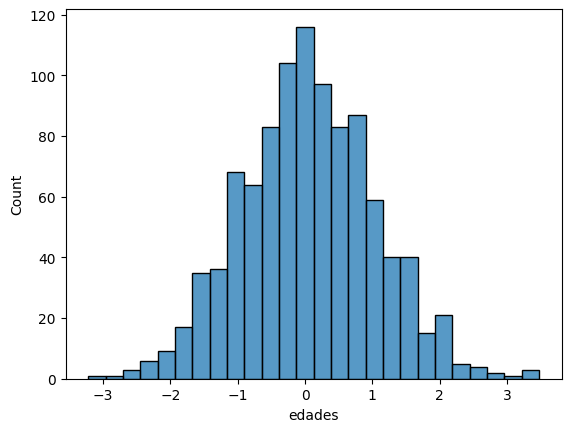

In [44]:
import seaborn as sns

fig_hist_freq_2 = sns.histplot(df_hist,x='edades')
plt.show

En lo personal, el código parece ser mas sencillo, ahora graficaremos un histograma de densidad.

<Axes: ylabel='Density'>

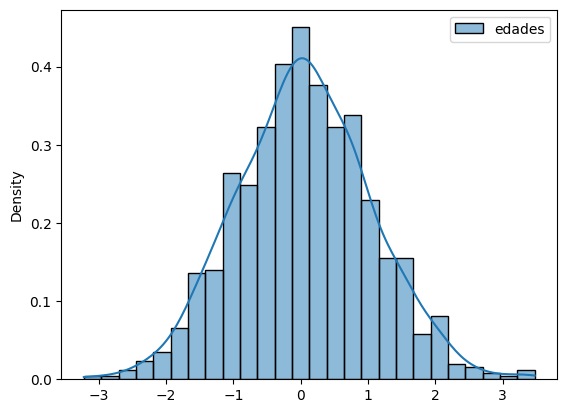

In [50]:
sns.histplot(df_hist, kde=True, stat='density')

Como podemos observar el código se reduce bastante y el resultado es el mismo.

### Hisograma con PX Express

Ahora es tiempo de usar PX express con el gráfico de frecuencia

In [84]:
import plotly.express as px

fig_hist_density_3 = px.histogram(df_hist['edades'])

fig_hist_density_3.show()

Y que tal con el diagrama de densidad

In [83]:
import plotly.express as px

fig_hist_density_3 = px.histogram(df_hist['edades'], histnorm='probability density')

fig_hist_density_3.show()

Hasta donde llego mi investigación, no pude encontrar la manera de graficar la curva de densidad.

## Boxplots

Es especialmente útil para identificar patrones, dispersión y valores atípicos en un conjunto de datos.

El boxplot permite identificar valores atípicios se divide de la siguiente manera:

- Primer cuartil (Q1) - Valor po debajo del 25% de los datos
- Segundo cuartil (Q2) - Valor del 50% de los datos (mediana)
- Tercer cuartil (Q3) - Representa el 75 de la distribución de los datos
- Intervalo Intercuartilico (IQR) - Es la distancia entre Q1 y Q3 (Q3-Q1)
- Bigotes - Muestran el valor mínimo y el valor máximo de los datos, se extienden hasta los valores mínimo y máximo dentro de 1.5 veces el IQR desde Q1 y Q3.
- Valores atípicos - Puntos individuales que se encuentran más allá de los bigotes y pueden indicar datos inusuales o extremos



### Version simplificada

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

edades = np.random.randint(15,36,50).tolist()

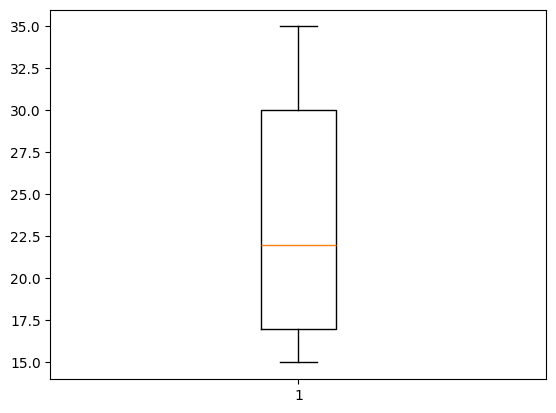

In [132]:
plt.boxplot(edades)
plt.show()

### Version con Dataframes

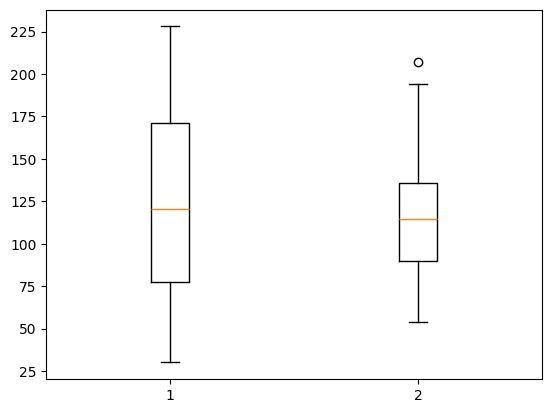

In [145]:
import numpy as np
import pandas as pd

x= np.random.randint(0,50,[2,50])
years = np.random.randint(2011,2021,50)
df_bars = pd.DataFrame(data={ "years": years, "Mex_medals":x[0], "Japan_medals":x[1]})
df_bars = df_bars.groupby("years")[["Mex_medals","Japan_medals"]].sum()
plt.boxplot(df_bars)
plt.show()

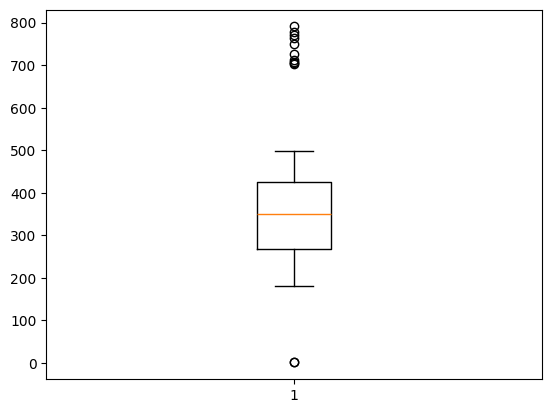

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


x= np.random.randint(180,500,100)
x= np.append(x,np.random.randint(700,800,10))
x= np.append(x,np.random.randint(1,3,2))
boxplot = plt.boxplot(x)
outliers = list(boxplot['fliers'][0].get_data()[1])

plt.show()


In [185]:
outliers

[1, 2, 750, 772, 704, 713, 791, 707, 702, 764, 727, 777]

In [172]:
print('Percentiles')
Q1=np.percentile(x,25)
Q2=np.percentile(x,50)
Q3=np.percentile(x,75)
Q4=np.percentile(x,100)
IQR = Q3-Q1

print(f'IQR(Q3-Q1): {IQR}')
print(f'Rango inferior | L = Q1-(k*IQR) {Q1-1.5*(IQR):.2f}')
print(f'Rango superior | R = Q3+(k*IQR) {Q3+1.5*(IQR):.2f}')

Percentiles
IQR(Q3-Q1): 157.75
Rango inferior | L = Q1-(k*IQR) 46.88
Rango superior | R = Q3+(k*IQR) 677.88


In [173]:
print(x)
y = x.copy

[442 338 259 420 403 411 486 390 208 494 355 401 337 306 320 184 496 367
 303 249 335 357 402 198 197 195 358 398 383 407 495 336 388 420 239 410
 477 321 486 240 374 262 361 345 393 458 420 370 302 218 184 221 384 274
 427 309 363 244 262 379 393 477 245 231 391 220 272 457 389 364 493 282
 443 296 431 408 396 368 390 284 456 430 441 393 417 389 376 277 449 221
 393 240 246 363 450 458 186 484 437 478 798 709 709 792 756 721 720 710
 765 775   1   1]


## Scatterplot

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

a, b = np.random.randint(1,11,[2,50])

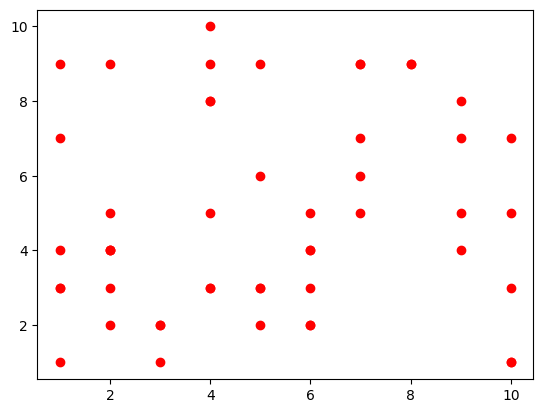

In [157]:
plt.scatter(x=a, y=b, color="red")
plt.show()

## Subplots

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

edades = list(range(1,51))
valores= np.random.randint(12,30,[2,50])

subplot_df = pd.DataFrame(data= {"edades": edades , "conteo_mex": valores[0], "conteo_usa": valores[1]})
# fig, ax = plt.subplot(1,2)